In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


##Plotting the general properties of the detected groups
####By Sergio Daniel Hernandez Charpak

In [86]:
inputfolder = '../'
input_file_1 = 'group_results_seeds_FA_0.8_Trace_1.0_search_FA_0.9_Trace_0.0.dat'

In [87]:
#Function to extract the thresholds from a group filename
def get_thresholds(filename):
    file_Dat = filename.strip('.dat')
    file_array = file_Dat.split('_')
    thresh_search_FA = float(file_array[9])
    thresh_search_Trace = float(file_array[11])
    thresh_seeds_FA = float(file_array[4])
    thresh_seeds_Trace = float(file_array[6])
    return thresh_search_FA, thresh_search_Trace, thresh_seeds_FA, thresh_seeds_Trace

In [88]:
thresh_search_FA, thresh_search_Trace, thresh_seeds_FA, thresh_seeds_Trace = get_thresholds(input_file_1)

In [89]:
group_data = np.loadtxt(inputfolder+input_file_1)

In [90]:
n_groups = len(group_data)

<p>The data is in the shape:</p>
<p> $\lambda_a$  |   $\lambda_b$  |   $\lambda_c$ | $x_{CM}$ | $y_{CM}$ | $z_{CM}$ | $\sum \delta$ | $Vol$ </p>
<p>Whith the data: </p>
<ul>
<li> $\lambda_a$ $\lambda_b$ $\lambda_c$ the 3 eigenvalues of the Inertia Tensor </li>
<li> $x_{CM}$ $y_{CM}$ $z_{CM}$ the coordinates of the Center of Mass </li>
<li> $\sum \delta$ The sum of the overdensity of all the particles in the group </li>
<li> $Vol$ The volume of the group in number of cells members of the group </li>
</ul>

In [91]:
print "There are", n_groups,"groups"

There are 778 groups


###Volume distribution
<p>We want to plot Log10 volume (# cells by group) vs #number of groups with that volume </p>

In [92]:
volumes = group_data[:,7]

Volume distribution for 
 growth: FA: 0.9 Trace: 0.0
 seeds: FA: 0.8 Trace: 1.0


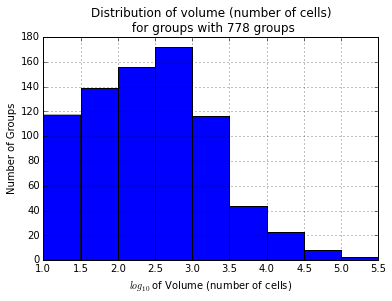

In [93]:
print "Volume distribution for \n growth: FA: " + str(thresh_search_FA) + " Trace: " + str(thresh_search_Trace) +"\n seeds: FA: " + str(thresh_seeds_FA) + " Trace: " + str(thresh_seeds_Trace) 
fig = plt.figure()
binwidth=0.5
plt.hist(np.log10(volumes), bins=np.arange(min(np.log10(volumes)), max(np.log10(volumes)) + binwidth, binwidth))
plt.xlabel('$log_{10}$ of Volume (number of cells) ')
plt.ylabel('Number of Groups')
plt.grid()
plt.title('Distribution of volume (number of cells) \n for groups with '+str(n_groups) + ' groups')
#plt.savefig("volumes_distr_+"str(n_groups)+".png",format = 'png')
#plt.close(fig)

###Inertia Tensor Analysis
<p> Analysis of the Different possible shape cases </p>
Reference: http://scipython.com/book/chapter-6-numpy/problems/p65/the-moment-of-inertia-tensor/

In [94]:
#Constants for writting the result of the shape of the respective detected group
CASES = []
CASE_0 = "none of the above"
CASES.append(CASE_0)
CASE_1 = "spherical top"
CASES.append(CASE_1)
CASE_2 = "oblate symmetric top"
CASES.append(CASE_2)
CASE_3 = "prolate symmetric top"
CASES.append(CASE_3)
CASE_4 = "asymmetric top"
CASES.append(CASE_4)

In [95]:
def inertia_tensor_case (I_a, I_b, I_c):
    case = 0
    #Case 1 Ia=Ib=Ic: spherical top;
    if(I_a==I_b==I_c):
        case = 1
        #print CASE_1
        return case
    #Case 2 Ia=Ib<Ic: oblate symmetric top;
    elif(I_a==I_b < I_c):
        case = 2
        #print CASE_2
        return case
    #Case 3 Ia<Ib=Ic: prolate symmetric top;
    elif(I_a < I_b == I_c):
        case = 3
        #print CASE_3
        return case
    #Case 4 Ia<Ib<Ic: asymmetric top
    elif(I_a < I_b < I_c):
        case = 4
        #print CASE_4
        return case
    #Case 0 - ?
    else:
        case = 0
        #print CASE_0
        return case

In [96]:
lambdas_a = group_data[:,0]
lambdas_b = group_data[:,1]
lambdas_c = group_data[:,2]

In [100]:
inertia_cases = np.zeros(5)
cases = np.zeros(n_groups)
for i in range(n_groups):
    cases [i] = inertia_tensor_case(lambdas_a[i], lambdas_b[i], lambdas_c[i])
    inertia_cases[cases [i]] += 1

Inertia Analysis for 
 growth: FA: 0.9 Trace: 0.0
 seeds: FA: 0.8 Trace: 1.0


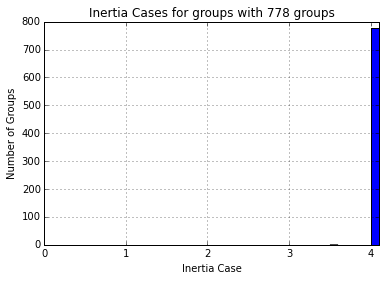

In [101]:
print "Inertia Analysis for \n growth: FA: " + str(thresh_search_FA) + " Trace: " + str(thresh_search_Trace) +"\n seeds: FA: " + str(thresh_seeds_FA) + " Trace: " + str(thresh_seeds_Trace) 
fig = plt.figure()
#binwidth=0.5
#plt.hist(np.log10(volumes), bins=np.arange(min(np.log10(volumes)), max(np.log10(volumes)) + binwidth, binwidth))
plt.hist(cases)
plt.xlabel('Inertia Case')
#plt.tick_params
plt.ylabel('Number of Groups')
plt.grid()
plt.xlim(0,4.1)
plt.xticks([0.0,1.0,2.0,3.0,4.0])
plt.title('Inertia Cases for groups with '+str(n_groups) + ' groups')
#plt.savefig("volumes_distr_+"str(n_groups)+".png",format = 'png')
#plt.close(fig)

In [102]:
print "-------------------------------------------"
print "Case", "Case Number", "Number of occurences"
for i in range (len(inertia_cases)):
    print str(CASES[i]), str(i), str(inertia_cases[i])

-------------------------------------------
Case Case Number Number of occurences
none of the above 0 0.0
spherical top 1 0.0
oblate symmetric top 2 0.0
prolate symmetric top 3 0.0
asymmetric top 4 778.0
